Xavier Walls
MCIS-6273 Data Mining (Prof. Maull) / Fall 2023
Homework II
November 30, 2023

In [2]:
import pandas as pd

df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-1')
df


,MFG_FIRM_FEI_NUM,LGL_NAME,LINE1_ADRS,LINE2_ADRS,CITY_NAME,PROVINCE_STATE,ISO_CNTRY_CODE,PRODUCT_CODE,REFUSAL_DATE,DISTRICT,ENTRY_NUM,RFRNC_DOC_ID,LINE_NUM,LINE_SFX_ID,FDA_SAMPLE_ANALYSIS,PRIVATE_LAB_ANALYSIS,REFUSAL_CHARGES,PRDCT_CODE_DESC_TEXT
0,3016998564,"xinyayuan biotech co., ltd",Standard Building 8,Zhusong; Intensive Processing Zone Of Agricult...,Chengdu,Sichuan,CN,25RGH99,9-Oct-20,DNEI,EKH-0734521-1,72,1,NaN,No,No,249,"MUSHROOMS AND OTHER FUNGI PRODUCTS, BROKEN OR ..."
1,3016638548,TRIPLE CROWN FOODS INC,26 Main St Ste A,NaN,Kings Park,NY,US,25JFD24,7-Apr-20,DSEI,EKM-0147848-3,11,36,NaN,No,No,249,GINGER ROOT (ROOT & TUBER VEGETABLE)
2,3014453449,Three Squirrels Inc.,No. 8 Jiusheng Road,"High Tech Industrial Development Zone, Yijiang...",Wuhu,Anhui,CN,33LGT12,27-Aug-19,DWCI,EKU-0054443-4,182,1,NaN,No,No,"324, 473","MIXED/ASSORTED SOFT CANDY WITHOUT NUTS, FRUIT ..."
3,2000005205,Pablo Ignacio Michel Ontiveros,Quintana Roo 1611,Col. Guadalupana,Guadalajara,Jalisco,MX,23BGT07,23-Oct-17,DSWI,EMK-0028113-4,11,2,NaN,Yes,No,"11, 256, 274","PEANUT, SHELLED"
4,3013071463,"Shantou Olive Pharmaceutical Co.,Ltd",NO. 4 Chaoshanlu Xixiang,Jinping,Shantou,Guangdong,CN,66VBY99,29-Jun-16,LOS-DO,EPG-3005802-1,1,36,NaN,No,No,"72, 218, 238, 328","MISCELLANEOUS PATENT MEDICINES, ETC."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163878,3015850818,"ANHUI XINONG PHARMA CO., LTD.","No. 9 Buwen Road Anhui, China",NaN,Anqing,Anhui,CN,21HMH05,29-Jun-22,DNEI,9R3-0012720-8,242,1,NaN,No,Yes,249,"DATES, DRIED OR PASTE"
163879,3026837464,PERFETTI VAN MELLE BRASIL LTDA,Av Douter Antonio Joaoabdalla Lote A Quadra 0 ...,NaN,Cajamar,NaN,BR,33EGT11,3-Oct-23,DSEI,9ST-0008090-7,11,2,NaN,No,No,218,"MINT CANDY, HARD, WITHOUT NUTS AND FRUIT (WIT..."
163880,3014503460,"LINHAI CITY CHUANCHENG GLASSES CO.,LTD","Fengxi Duqiao,Linhai City,Zhejiang",NaN,Linhai Zhejiang,NaN,CN,86HQY,6-Apr-20,DWCI,9T2-0042246-2,12,1,NaN,No,No,235,SUNGLASSES (NON-PRESCRIPTION INCLUDING PHOTOSE...
163881,3003965192,"Industria Guatemalteca De Macadamia,S.A.","Diagonal 6m 10-65, Zona 10planta Alta",NaN,Guatemala,NaN,GT,23BEC18,24-Oct-22,DSWI,9UA-0280065-6,11,3,NaN,No,No,9,"MACADAMIA, SHELLED"


Task: Now that you have the data, you will read the CSV file. Produced a file called "country_violations_2014-2023.csv" which contains just the counts of the violations grouped by ['ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME'].

you will need to use groupby().count() and restrict the columns to a single column (ENTRY_NUM will do) using .loc()

In [2]:
selected_columns = df.loc[:, ['ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME', 'ENTRY_NUM']]

grouped_df = selected_columns.groupby(['ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME'])['ENTRY_NUM'].count().reset_index()

grouped_df.to_csv('country_violations_2014-2023.csv', index=False)

country_violations_df = pd.read_csv('country_violations_2014-2023.csv')

country_violations_df


,ISO_CNTRY_CODE,PROVINCE_STATE,CITY_NAME,ENTRY_NUM
0,AE,AE-AJ,AJMAN,3
1,AE,AE-DU,Dubai,1
2,AE,AE-DU,Dubay,3
3,AE,AE-DU,Jedda,1
4,AE,AE-NOTA,Abu Dhabi,13
...,...,...,...,...
11352,ZM,Lusaka,Lusaka,2
11353,ZW,Bulawayo,Bulawayo,9
11354,ZW,Harare,Harare,12
11355,ZW,Harare,Workington,1


In [4]:
# print the REFUSAL DATE column
df['REFUSAL_DATE']
print(df['REFUSAL_DATE'])

# Convert the REFUSAL DATE column to datetime type
df['REFUSAL_DATE'] = pd.to_datetime(df['REFUSAL_DATE'])

# Extract the MONTH from the column
df['MONTH'] = df['REFUSAL_DATE'].dt.month
print(df['MONTH'])

# Extract the YEAR from the column
df['YEAR'] = df['REFUSAL_DATE'].dt.year
print(df['YEAR'])

# print the columns showing the newly added Month and Year columns
df.columns



0        2020-10-09
1        2020-04-07
2        2019-08-27
3        2017-10-23
4        2016-06-29
            ...    
163878   2022-06-29
163879   2023-10-03
163880   2020-04-06
163881   2022-10-24
163882   2022-04-01
Name: REFUSAL_DATE, Length: 163883, dtype: datetime64[ns]
0         10
1          4
2          8
3         10
4          6
          ..
163878     6
163879    10
163880     4
163881    10
163882     4
Name: MONTH, Length: 163883, dtype: int64
0         2020
1         2020
2         2019
3         2017
4         2016
          ... 
163878    2022
163879    2023
163880    2020
163881    2022
163882    2022
Name: YEAR, Length: 163883, dtype: int64


Index(['MFG_FIRM_FEI_NUM', 'LGL_NAME', 'LINE1_ADRS', 'LINE2_ADRS', 'CITY_NAME',
       'PROVINCE_STATE', 'ISO_CNTRY_CODE', 'PRODUCT_CODE', 'REFUSAL_DATE',
       'DISTRICT', 'ENTRY_NUM', 'RFRNC_DOC_ID', 'LINE_NUM', 'LINE_SFX_ID',
       'FDA_SAMPLE_ANALYSIS', 'PRIVATE_LAB_ANALYSIS', 'REFUSAL_CHARGES',
       'PRDCT_CODE_DESC_TEXT', 'MONTH', 'YEAR'],
      dtype='object')

In [5]:
grouped_df

# Get the additional columns to a new dataframe and add to a new .csv file
additional_columns = df.loc[:, [ 'YEAR', 'MONTH', 'ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME']]

grouped_addtl_cols_df = additional_columns.groupby(['YEAR', 'MONTH', 'ISO_CNTRY_CODE','PROVINCE_STATE','CITY_NAME']).count().reset_index()

grouped_addtl_cols_df.to_csv('country_violations_year_month_2014-2023.csv')

grouped_addtl_cols_df

,YEAR,MONTH,ISO_CNTRY_CODE,PROVINCE_STATE,CITY_NAME
0,2014,1,AF,AF-KAB,Kabul
1,2014,1,AR,Buenos Aires,Jose Leon Suarez
2,2014,1,AU,New South Wales,Melrose Park
3,2014,1,AU,Queensland,Caboolture
4,2014,1,AU,South Australia,Mawson Lakes
...,...,...,...,...,...
42493,2023,10,VN,Di An District,Di An Ward
42494,2023,10,VN,Ho Chi Minh,HOCHIMINH
42495,2023,10,VN,Hoa Binh,Luong Son District
42496,2023,10,VN,VN-41,Ben Luc


In [7]:

# Group the data by 'ISO_CNTRY_CODE', 'CITY_NAME', 'PROVINCE_STATE' and count the number of rows to get the number of violations
most_violations_city = df.groupby(['ISO_CNTRY_CODE', 'CITY_NAME', 'PROVINCE_STATE', 'MONTH', 'YEAR']).size().reset_index(name='VIOLATION_COUNT')

# Sort the results to find the entry with the most violations
most_violations_city_sorted = most_violations_city.sort_values(by='VIOLATION_COUNT', ascending=False)

# Display the top entry
display(most_violations_city_sorted.head(1))


,ISO_CNTRY_CODE,CITY_NAME,PROVINCE_STATE,MONTH,YEAR,VIOLATION_COUNT
28929,MX,Ciudad De Mexico,Ciudad de Mexico,4,2022,613


§ Task: What are the 10 most frequent products in the IRR for 2018 (using 'PRDCT_CODE_DESC_TEXT')?

In [1]:
import pandas as pd

products_df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-1')

products_df[['PRDCT_CODE_DESC_TEXT']]

top_products = products_df[['PRDCT_CODE_DESC_TEXT']].value_counts()

print('Here is the top 10 most frequent products in the IRR for 2018:')
display(top_products.head(11))

Here is the top 10 most frequent products in the IRR for 2018:


PRDCT_CODE_DESC_TEXT                                                                             
MISCELLANEOUS PATENT MEDICINES, ETC.                                                                 6831
SUNGLASSES (NON-PRESCRIPTION INCLUDING PHOTOSENSITIVE)                                               3563
VITAMIN, MINERAL, PROTEINS AND UNCONVENTIONAL DIETARY SPECIALITIES FOR HUMANS AND ANIMALS, N.E.C.    3445
LENSES, SOFT CONTACT, DAILY WEAR                                                                     2219
HERBALS & BOTANICALS (NOT TEAS), N.E.C.                                                              1936
CORN CHIPS, FRIED                                                                                    1907
TUNA (ALBACORE, YELLOWFIN, BLUEFIN, SKIPJACK, ETC.)                                                  1796
DEVICE, EXTERNAL PENILE RIGIDITY                                                                     1715
SHRIMP AND PRAWNS, AQUACULTURE HARVESTED FISHERY/SEAFO

Task: BONUS (+1 point) What was the company associated with the largest violation in a single month?

In [2]:
company_violations_df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-1')

# print the REFUSAL DATE column
company_violations_df['REFUSAL_DATE']
print(company_violations_df['REFUSAL_DATE'])

# Convert the REFUSAL DATE column to datetime type
company_violations_df['REFUSAL_DATE'] = pd.to_datetime(company_violations_df['REFUSAL_DATE'])
# Extract the MONTH from the column
company_violations_df['MONTH'] = company_violations_df['REFUSAL_DATE'].dt.month
# Extract the YEAR from the column
company_violations_df['YEAR'] = company_violations_df['REFUSAL_DATE'].dt.year


0          9-Oct-20
1          7-Apr-20
2         27-Aug-19
3         23-Oct-17
4         29-Jun-16
            ...    
163878    29-Jun-22
163879     3-Oct-23
163880     6-Apr-20
163881    24-Oct-22
163882     1-Apr-22
Name: REFUSAL_DATE, Length: 163883, dtype: object


In [3]:
group = company_violations_df.groupby(['LGL_NAME', 'MONTH', 'YEAR']).size().reset_index(name='Violation_Count')

largest_violation = group.sort_values(by='Violation_Count', ascending=False).head(1)

company_largest_violation = largest_violation['LGL_NAME'].iloc[0]

print(company_largest_violation)

largest_violation

COMERCIALIZADORA PEPSICO


,LGL_NAME,MONTH,YEAR,Violation_Count
12001,COMERCIALIZADORA PEPSICO,4,2022,610


In [3]:

try:
    df = pd.read_csv('REFUSAL_ENTRY_2014-October2023.csv', encoding='ISO-8859-1')
    missing_data_info = df.isnull().sum()
except Exception as e:
    error = e

missing_data_info if 'missing_data_info' in locals() else error


MFG_FIRM_FEI_NUM             0
LGL_NAME                     1
LINE1_ADRS                  12
LINE2_ADRS               99427
CITY_NAME                    2
PROVINCE_STATE           52924
ISO_CNTRY_CODE               0
PRODUCT_CODE                 1
REFUSAL_DATE                 0
DISTRICT                     0
ENTRY_NUM                    0
RFRNC_DOC_ID                 0
LINE_NUM                     0
LINE_SFX_ID             152703
FDA_SAMPLE_ANALYSIS          0
PRIVATE_LAB_ANALYSIS         0
REFUSAL_CHARGES              0
PRDCT_CODE_DESC_TEXT         1
dtype: int64

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer


# Replace NaN values with a placeholder string, such as 'Unknown'
df['ISO_CNTRY_CODE'] = df['ISO_CNTRY_CODE'].fillna('Unknown')
df['CITY_NAME'] = df['CITY_NAME'].fillna('Unknown')

try:
    missing_data_info = df.isnull().sum()
except Exception as e:
    error = e

missing_data_info if 'missing_data_info' in locals() else error


MFG_FIRM_FEI_NUM             0
LGL_NAME                     1
LINE1_ADRS                  12
LINE2_ADRS               99427
CITY_NAME                    0
PROVINCE_STATE           52924
ISO_CNTRY_CODE               0
PRODUCT_CODE                 1
REFUSAL_DATE                 0
DISTRICT                     0
ENTRY_NUM                    0
RFRNC_DOC_ID                 0
LINE_NUM                     0
LINE_SFX_ID             152703
FDA_SAMPLE_ANALYSIS          0
PRIVATE_LAB_ANALYSIS         0
REFUSAL_CHARGES              0
PRDCT_CODE_DESC_TEXT         1
dtype: int64

In [30]:
df

,REFUSAL_CHARGES,ISO_CNTRY_CODE,CITY_NAME
0,249,CN,Chengdu
1,249,US,Kings Park
2,"324, 473",CN,Wuhu
3,"11, 256, 274",MX,Guadalajara
4,"72, 218, 238, 328",CN,Shantou
...,...,...,...
163878,249,CN,Anqing
163879,218,BR,Cajamar
163880,235,CN,Linhai Zhejiang
163881,9,GT,Guatemala


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# Replace NaN values with a placeholder string, such as 'Unknown'
df['ISO_CNTRY_CODE'] = df['ISO_CNTRY_CODE'].fillna('Unknown')
df['CITY_NAME'] = df['CITY_NAME'].fillna('Unknown')

# Make sure all data are of string type
df['ISO_CNTRY_CODE'] = df['ISO_CNTRY_CODE'].astype(str)
df['CITY_NAME'] = df['CITY_NAME'].astype(str)

# Extract the necessary columns
data_subset = df[['REFUSAL_CHARGES', 'ISO_CNTRY_CODE', 'CITY_NAME']]

# Initialize the LabelBinarizer for country codes and city names
country_binarizer = LabelBinarizer()
city_binarizer = LabelBinarizer()

# Fit and transform the country codes and city names
country_matrix = country_binarizer.fit_transform(data_subset['ISO_CNTRY_CODE'])
city_matrix = city_binarizer.fit_transform(data_subset['CITY_NAME'])

# Assuming charges are separated by commas, split the charges into lists
# Make sure to handle NaN values and convert everything to strings
charges_lists = data_subset['REFUSAL_CHARGES'].str.split(', ').fillna('Unknown').apply(lambda x: x if isinstance(x, list) else ['Unknown'])

# Initialize the MultiLabelBinarizer for refusal charges
charges_binarizer = MultiLabelBinarizer()

# Fit and transform the refusal charges
charges_matrix = charges_binarizer.fit_transform(charges_lists)

# Combine the binary matrices into a single dataset
import numpy as np
final_dataset = np.hstack((country_matrix, city_matrix, charges_matrix))

# Now final_dataset is ready for clustering with K-means


In [6]:

final_dataset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from scipy.sparse import csr_matrix

final_dataset_sparse = csr_matrix(final_dataset)

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(final_dataset_sparse)

# Get the centroids of each cluster
centroids = minibatch_kmeans.cluster_centers_
print("Centroids for k=5:")
print(centroids)


Centroids for k=5:
[[2.89092539e-05 4.81820898e-05 6.69731048e-03 ... 4.57055303e-02
  2.24528538e-03 8.48968421e-02]
 [2.71445447e-03 0.00000000e+00 2.53851761e-03 ... 5.78078267e-04
  1.00535351e-04 5.02676754e-05]
 [0.00000000e+00 0.00000000e+00 4.55010807e-03 ... 9.10021613e-05
  9.39597315e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.66650134e-02
  0.00000000e+00 4.47872235e-02]
 [0.00000000e+00 0.00000000e+00 7.75344059e-05 ... 2.12831944e-02
  1.86082574e-03 6.59042450e-03]]


In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from scipy.sparse import csr_matrix

final_dataset_sparse = csr_matrix(final_dataset)

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)
minibatch_kmeans.fit(final_dataset_sparse)

# Get the centroids of each cluster
centroids = minibatch_kmeans.cluster_centers_
print("Centroids for k=10:")
print(centroids)


Centroids for k=10:
[[4.67675807e-05 7.79459679e-05 7.84136437e-03 ... 6.53343103e-02
  3.61669291e-03 5.76800162e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.10383045e-02
  1.86661482e-03 6.76647871e-03]
 [6.05775056e-04 0.00000000e+00 3.70195867e-03 ... 0.00000000e+00
  3.23080030e-03 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.17944398e-03 ... 2.47683235e-02
  5.61639989e-05 4.74754283e-01]
 [0.00000000e+00 0.00000000e+00 9.51225741e-03 ... 2.55362615e-03
  0.00000000e+00 1.88329928e-02]
 [0.00000000e+00 0.00000000e+00 2.27628397e-03 ... 7.96699388e-03
  0.00000000e+00 1.42267748e-04]]


In [6]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from scipy.sparse import csr_matrix

final_dataset_sparse = csr_matrix(final_dataset)

minibatch_kmeans = MiniBatchKMeans(n_clusters=12, random_state=42)
minibatch_kmeans.fit(final_dataset_sparse)

# Get the centroids of each cluster
centroids = minibatch_kmeans.cluster_centers_
print("Centroids for k=12:")
print(centroids)


Centroids for k=12:
[[1.29813933e-03 0.00000000e+00 6.63493437e-03 ... 5.76950815e-04
  0.00000000e+00 0.00000000e+00]
 [3.91118991e-05 6.51864986e-05 5.78856107e-03 ... 5.87851844e-02
  2.95946704e-03 1.14232820e-01]
 [3.35309060e-03 0.00000000e+00 2.33700254e-03 ... 4.74174428e-04
  1.35478408e-04 3.04826418e-04]
 ...
 [0.00000000e+00 0.00000000e+00 3.37450226e-04 ... 0.00000000e+00
  5.06175339e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33817595e-03
  0.00000000e+00 1.64447135e-02]
 [0.00000000e+00 0.00000000e+00 3.69890882e-03 ... 7.39781764e-04
  0.00000000e+00 3.42149066e-03]]


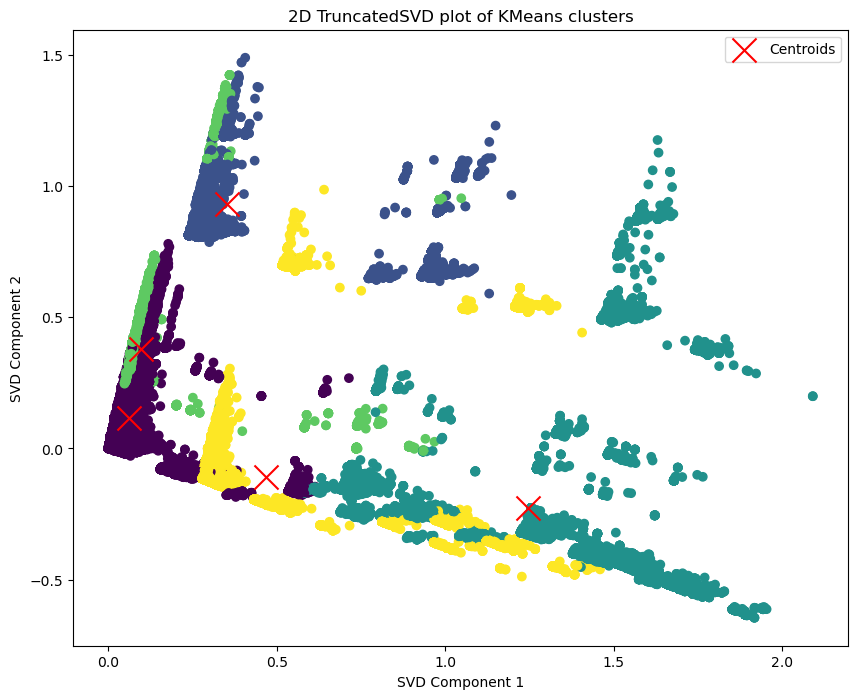

In [8]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Apply TruncatedSVD to reduce the data to two dimensions for visualization
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(final_dataset_sparse)  # Works directly on sparse data

# Perform MiniBatchKMeans clustering
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(final_dataset_sparse)

# Predict the cluster labels
labels = minibatch_kmeans.predict(final_dataset_sparse)

# Plotting the reduced data with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('2D TruncatedSVD plot of KMeans clusters')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

# Plot the centroids of the clusters
centroids_reduced = svd.transform(minibatch_kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.legend()

plt.show()


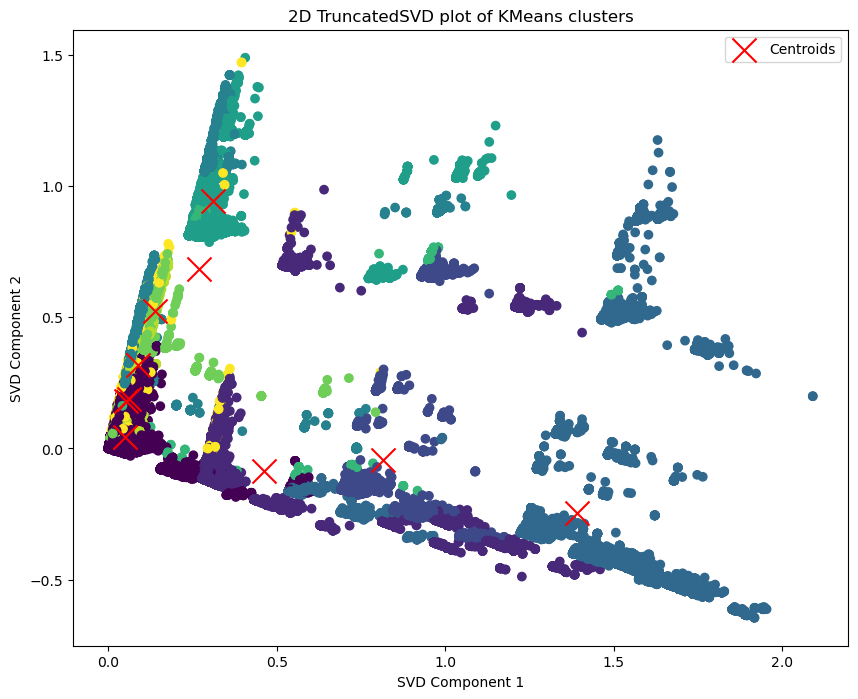

In [15]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Apply TruncatedSVD to reduce the data to two dimensions for visualization
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(final_dataset_sparse)  # Works directly on sparse data

# Perform MiniBatchKMeans clustering
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)
minibatch_kmeans.fit(final_dataset_sparse)

# Predict the cluster labels
labels = minibatch_kmeans.predict(final_dataset_sparse)

# Plotting the reduced data with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('2D TruncatedSVD plot of KMeans clusters')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

# Plot the centroids of the clusters
centroids_reduced = svd.transform(minibatch_kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.legend()

plt.show()

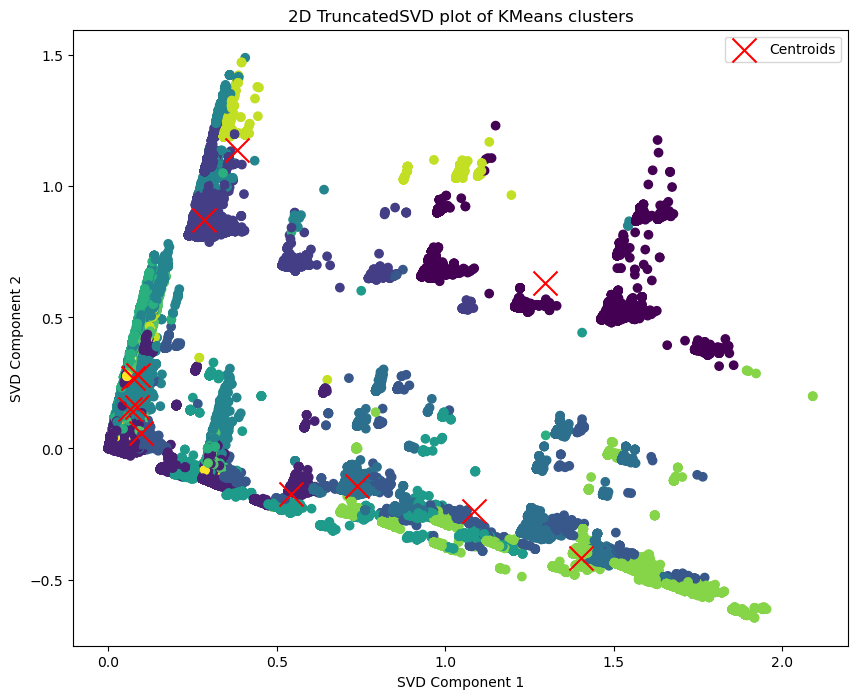

In [16]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Apply TruncatedSVD to reduce the data to two dimensions for visualization
svd = TruncatedSVD(n_components=2)
reduced_data = svd.fit_transform(final_dataset_sparse)  # Works directly on sparse data

# Perform MiniBatchKMeans clustering
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=12, random_state=42)
minibatch_kmeans.fit(final_dataset_sparse)

# Predict the cluster labels
labels = minibatch_kmeans.predict(final_dataset_sparse)

# Plotting the reduced data with cluster labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('2D TruncatedSVD plot of KMeans clusters')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

# Plot the centroids of the clusters
centroids_reduced = svd.transform(minibatch_kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.legend()

plt.show()

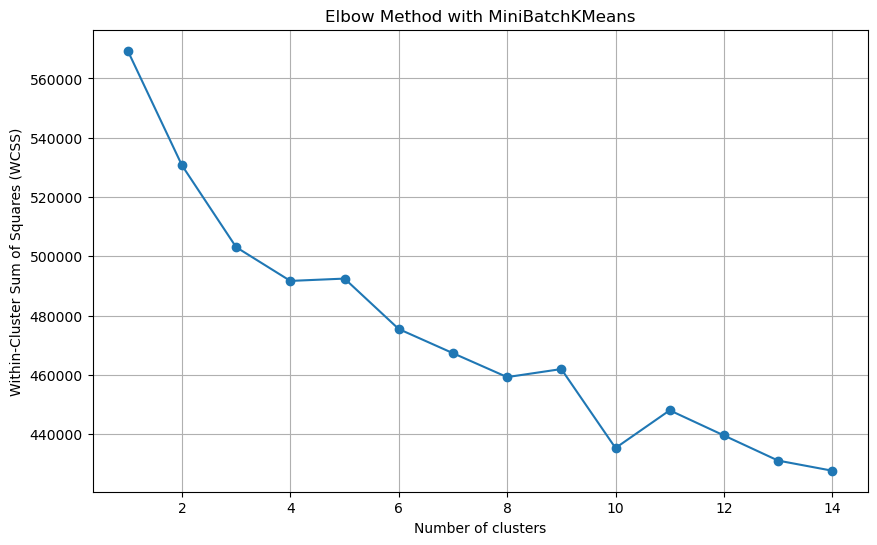

In [8]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

max_clusters = 15  # Reduced the range for quicker computation
css = []  # within cluster sum of squares

for k in range(1, max_clusters):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=3, random_state=0)
    minibatch_kmeans.fit(final_dataset_sparse)
    css.append(minibatch_kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters), css, marker='o')
plt.title('Elbow Method with MiniBatchKMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()
